In [1]:
# python notebook for Make Your Own Neural Network
# code for a 3-layer neural network, and code for learning the MNIST dataset
# this version trains using the MNIST dataset, then tests on our own images
# (c) Tariq Rashid, 2016
# license is GPLv2

In [2]:
from rich import print

In [3]:
import time
import glob

import numpy
import matplotlib.pyplot as plt
%matplotlib inline

import imageio
import scipy.ndimage

### import the Classifier

In [4]:
from neural_network import Classifier

### create neural network

In [5]:
input_nodes, hidden_nodes, output_nodes = 784, 200, 10

learning_rate = 0.1

n = Classifier(input_nodes,hidden_nodes,output_nodes, learning_rate)

### set training epoch

In [6]:
# epochs = 10
epochs = 1

### load the mnist training data CSV file into a list

In [7]:
training_data_file = open("mnist_dataset/mnist_train.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

### train the neural network

In [8]:
%%time

start = time.perf_counter()
for e in range(epochs):
    for record in training_data_list:
        all_values = record.split(',')
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        targets = numpy.zeros(output_nodes) + 0.01
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets, print_counter=True)
        
        ## create rotated variations
        # rotated anticlockwise by x degrees
        x = 10
        inputs_plusx_img = scipy.ndimage.interpolation.rotate(inputs.reshape(28,28), x, cval=0.01, order=1, reshape=False)
        n.train(inputs_plusx_img.reshape(784), targets, print_counter=True)
        
        # rotated clockwise by x degrees
        inputs_minusx_img = scipy.ndimage.interpolation.rotate(inputs.reshape(28,28), -x, cval=0.01, order=1, reshape=False)
        n.train(inputs_minusx_img.reshape(784), targets, print_counter=True)
print(f'The training takes {time.perf_counter()-start} seconds.')

counter =  10000

counter =  20000

counter =  30000

counter =  40000

counter =  50000

counter =  60000

counter =  70000

counter =  80000

counter =  90000

counter =  100000

counter =  110000

counter =  120000

counter =  130000

counter =  140000

counter =  150000

counter =  160000

counter =  170000

counter =  180000

The training takes 138.63245802000165 seconds.

CPU times: user 52min 35s, sys: 2min 38s, total: 55min 13s
Wall time: 2min 18s


### plot classifier error

<Figure size 1152x576 with 1 Axes>

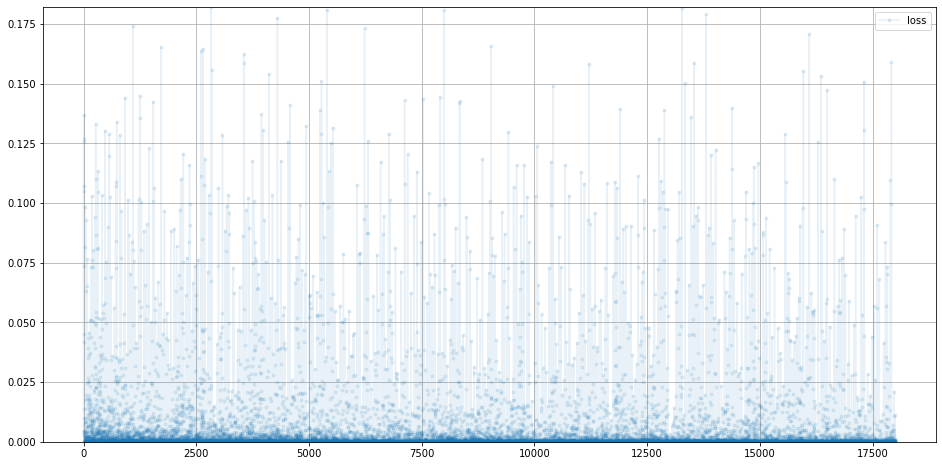

In [9]:
n.plot_progress()

### load the mnist test data CSV file into a list

In [10]:
test_data_file = open("mnist_dataset/mnist_test.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

### test the neural network

In [11]:
scorecard = []

for record in test_data_list:
    all_values = record.split(',')
    correct_label = int(all_values[0])
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    outputs = n.query(inputs)
    label = numpy.argmax(outputs)
    if (label == correct_label):
        scorecard.append(1)
    else:
        scorecard.append(0)
        
# calculate the performance score, the fraction of correct answers
scorecard_array = numpy.asarray(scorecard)
performance = scorecard_array.sum() / scorecard_array.size
print(f"{performance = }")

performance = 0.9615

### our own image test data set

In [12]:
our_own_dataset = []

# load the png image data as test data set
for image_file_name in glob.glob('my_own_images/2828_my_own_?.png'):
    print(f"loading {image_file_name}")
    label = int(image_file_name[-5:-4])
    img_array = imageio.imread(image_file_name, as_gray=True)
    img_data  = 255.0 - img_array.reshape(784)
    img_data = (img_data / 255.0 * 0.99) + 0.01
    
    record = numpy.append(label, img_data)
    our_own_dataset.append(record)

loading my_own_images/2828_my_own_5.png

loading my_own_images/2828_my_own_3.png

loading my_own_images/2828_my_own_4.png

loading my_own_images/2828_my_own_6.png

loading my_own_images/2828_my_own_2.png

### test the neural network with our own images

outputs = array([[1.50987140e-03],
       [1.58169405e-03],
       [7.18871453e-03],
       [1.48664900e-03],
       [9.31417027e-01],
       [2.44608366e-02],
       [1.24486554e-02],
       [1.67665856e-02],
       [4.56186120e-05],
       [5.36090823e-03]])

network says 4

match!

<Figure size 432x288 with 1 Axes>

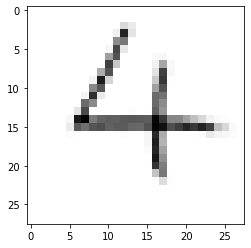

In [13]:
item = 2  # record to test

# plot image
plt.imshow(our_own_dataset[item][1:].reshape(28,28), cmap='Greys', interpolation='None')

correct_label = our_own_dataset[item][0]  # correct answer is first value
inputs = our_own_dataset[item][1:]        # data is remaining values

outputs = n.query(inputs)
print(f"{outputs = }")

# the index of the highest value corresponds to the label
label = numpy.argmax(outputs)
print(f"network says {label}")

print("match!") if (label == correct_label) else print("no match!")

# backquery

targets = array([0.99, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01])

<matplotlib.image.AxesImage object at 0x7f20ac231dc0>

<Figure size 432x288 with 1 Axes>

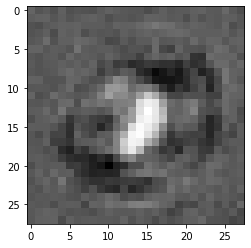

In [14]:
# run the network backwards, given a label, see what image it produces


# label = 7  # label to test
label = 0  # label to test

# create the output signals for this label
targets = numpy.zeros(output_nodes) + 0.01
# all_values[0] is the target label for this record
targets[label] = 0.99
print(f"{targets = }")

# get image data
image_data = n.backquery(targets)

# plot image data
plt.imshow(image_data.reshape(28,28), cmap='Greys', interpolation='None')

In [15]:
np.random.rand(28*28).shape

(784,)